<a href="https://colab.research.google.com/github/SuryaTeja-aiml/2024-StatMLAssignments/blob/main/2303A52007_StatMLAssignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1:

[breast_cancer_survival](https://www.kaggle.com/datasets/kellistephenson/increasing-breast-cancer-awareness)

1. Read the data with pandas and find features and target variables
2. Find target variable
3. Select suitable model and train
4. Find accuracy with different test sizes

In [211]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [212]:
data = pd.read_csv("breast_cancer_survival.csv")
print(data.head())

   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0   42  FEMALE   0.95256   2.15000  0.007972 -0.048340           II   
1   54  FEMALE   0.00000   1.38020 -0.498030 -0.507320           II   
2   63  FEMALE  -0.52303   1.76400 -0.370190  0.010815           II   
3   78  FEMALE  -0.87618   0.12943 -0.370380  0.132190            I   
4   42  FEMALE   0.22611   1.74910 -0.543970 -0.390210           II   

                       Histology ER status PR status HER2 status Surgery_type  \
0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   Lumpectomy   
3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
4  Infiltrating Ductal Carcinoma  Positive  Positive    Positive   Lumpectomy   

  Date_of_Surgery Date_of_Last_Visit Patient_Status  
0       20-May-18          26-Au

In [213]:
data.isnull().sum()

,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
ER status,0
PR status,0


In [214]:
data['Surgery_type'].unique()

array(['Other', 'Lumpectomy', 'Modified Radical Mastectomy',
       'Simple Mastectomy'], dtype=object)

In [215]:
data['Histology'].unique()

array(['Infiltrating Ductal Carcinoma', 'Infiltrating Lobular Carcinoma',
       'Mucinous Carcinoma'], dtype=object)

In [240]:
data.replace('FEMALE',0, inplace=True)
data.replace('MALE',1, inplace=True)
data.replace('Positive',1, inplace=True)
data.replace('Negative',0, inplace=True)
data.replace('Dead',0, inplace=True)
data.replace('Alive',1, inplace=True)
data.replace('I',1, inplace=True)
data.replace('II',2, inplace=True)
data.replace('III',3, inplace=True)
data.replace('Infiltrating Ductal Carcinoma',1, inplace=True)
data.replace('Infiltrating Lobular Carcinoma',2, inplace=True)
data.replace('Mucinous Carcinoma',3, inplace=True)
data.replace('Other',0, inplace=True)
data.replace('Lumpectomy',1, inplace=True)
data.replace('Modified Radical Mastectomy',2, inplace=True)
data.replace('Simple Mastectomy',3, inplace=True)

In [217]:
x=data.drop(['Patient_Status','Date_of_Surgery','Date_of_Last_Visit'],axis=1)
y=data['Patient_Status']
x.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type
0,42,0,0.95256,2.15000,0.007972,-0.048340,2,1,1,1,0,0
1,54,0,0.00000,1.38020,-0.498030,-0.507320,2,1,1,1,0,0
2,63,0,-0.52303,1.76400,-0.370190,0.010815,2,1,1,1,0,1
3,78,0,-0.87618,0.12943,-0.370380,0.132190,1,1,1,1,0,0
4,42,0,0.22611,1.74910,-0.543970,-0.390210,2,1,1,1,1,1


In [218]:
y.head()

,Patient_Status
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0


In [219]:
y.isnull().sum()
y.fillna(0,inplace=True)

In [220]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x,y=smote.fit_resample(x,y)

In [221]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(408, 12) (102, 12) (408,) (102,)


In [222]:
y.isnull().sum()

0

In [223]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [224]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.49019607843137253


In [225]:
print(confusion_matrix(y_test,y_pred))

[[ 0 52]
 [ 0 50]]


<Axes: >

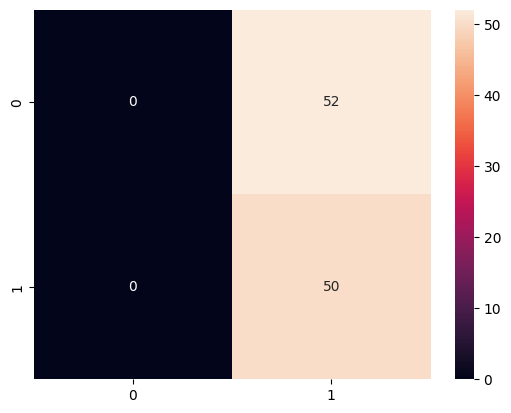

In [226]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [227]:
scaler = StandardScaler()
model = LogisticRegression()

In [228]:
def evaluate_model(test_size):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    model.fit(x_train_scaled, y_train)
    predictions = model.predict(x_test_scaled)
    return accuracy_score(y_test, predictions)

In [229]:
test_sizes = [0.2, 0.3, 0.4]
for size in test_sizes:
    accuracy = evaluate_model(size)
    print(f"Test size: {size}, Accuracy: {accuracy}")

Test size: 0.2, Accuracy: 0.6372549019607843
Test size: 0.3, Accuracy: 0.6209150326797386
Test size: 0.4, Accuracy: 0.6225490196078431


Question 2:

Implement Logistic Regression using pre-defied library. Analysis of different training and testing splits ranges, and find the accuracy

In [230]:
from sklearn.linear_model import LogisticRegression,Perceptron
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [231]:
yp = model.predict(x_test)
print(accuracy_score(y_test,yp))

0.6862745098039216


In [232]:
print(confusion_matrix(y_test,yp))

[[35 17]
 [15 35]]


<Axes: >

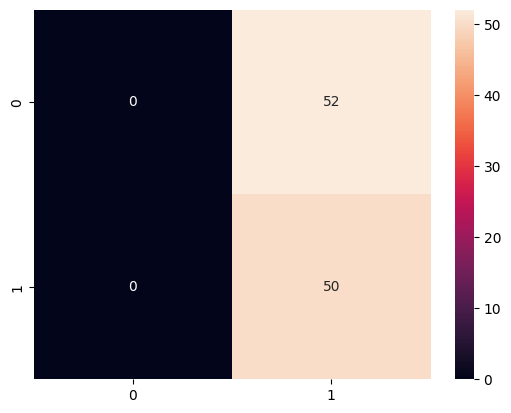

In [233]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [234]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

         0.0       0.70      0.67      0.69        52
         1.0       0.67      0.70      0.69        50

    accuracy                           0.69       102
   macro avg       0.69      0.69      0.69       102
weighted avg       0.69      0.69      0.69       102



In [235]:
pm= Perceptron()
pm.fit(x_train,y_train)

Perceptron()

In [236]:
yp = pm.predict(x_test)
print(accuracy_score(y_test,yp))

0.5882352941176471


In [237]:
print(confusion_matrix(y_test,yp))

[[33 19]
 [23 27]]


<Axes: >

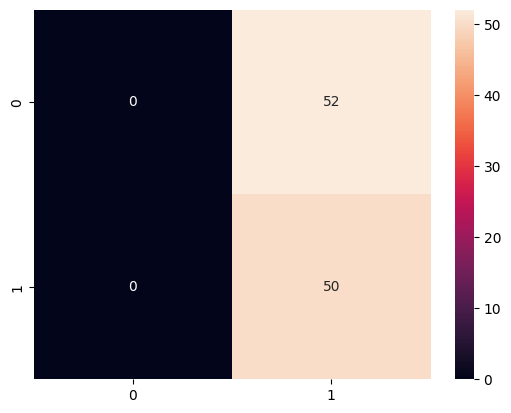

In [238]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [239]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

         0.0       0.59      0.63      0.61        52
         1.0       0.59      0.54      0.56        50

    accuracy                           0.59       102
   macro avg       0.59      0.59      0.59       102
weighted avg       0.59      0.59      0.59       102

